# Задание

**Задание 1:** В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами. Пример результата с подсказкой содержит изображение railway_result.png. Подсказка 2: чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.

**Задание 2:** В папке находится изображение palm.png с пальмой. Используя классические аффинные преобразования, необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png

# Импорт библиотек

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

Функция вывода размеченных изображений

In [9]:
def show_labeled_images(images_labeled: dict):
    
    f, ax = plt.subplots(1,images_labeled.__len__())

    for i, (label, image) in enumerate(images_labeled.items()):
        ax[i].imshow(image)
        ax[i].set_title(label)

    f.set_size_inches(10,10)

# Задание №1: Преобразование перспективы

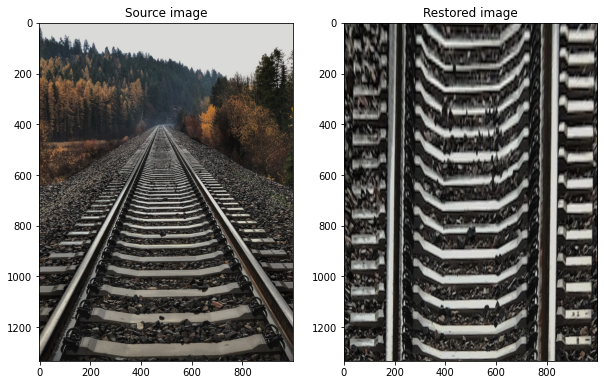

In [32]:
image = cv.imread("task_1/railway.jpeg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

h, w = image.shape[:2]

points = [
    [290, 601],
    [680, 599],
    [105, 820],
    [901, 810],
]

corners = [
        [0, 0], 
        [w, 0], 
        [0, h], 
        [w, h]
]

M = cv.getPerspectiveTransform(np.float32(points), np.float32(corners))
image_deformed = cv.warpPerspective(image, M, (w, h))

show_labeled_images({"Source image": image, "Restored image": image_deformed})

# Задание №2: Создание тени

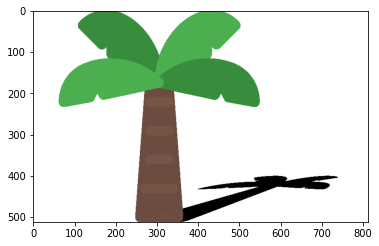

In [124]:
image = cv.imread("task_2/palm.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

image = cv.copyMakeBorder(image, 0, 0, 50, 250, cv.BORDER_CONSTANT, None, value = [255,255,255])

h, w = image.shape[:2]

shadow = image.copy()
shadow = cv.cvtColor(shadow, cv.COLOR_RGB2GRAY)
ret, shadow = cv.threshold(shadow, thresh=200, maxval=255, type=cv.THRESH_BINARY)

shadow = 255 - shadow

corners = [
    [500, 400],
    [900, 400],
    [0, h],
    [w, h],
]

points = [
        [0, 0], 
        [w, 0], 
        [0, h], 
        [w, h]
]

M = cv.getPerspectiveTransform(np.float32(points), np.float32(corners))
shadow_warped = cv.warpPerspective(shadow, M, (w, h))

shadow_warped = 255 - shadow_warped
shadow = cv.cvtColor(shadow, cv.COLOR_GRAY2RGB)
shadow_warped = cv.cvtColor(shadow_warped, cv.COLOR_GRAY2RGB)

image_final = shadow_warped + image * (shadow//255)

plt.imshow(image_final)